# Markdown to run and plot pairs of Individuals

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)

print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

compute-a-16-99.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


In [2]:
%%time
def run_plot_pair(folder_in="./data/hdf5/1240k_v43/ch", iids = ["", ""],
                  ibd_in=1, ibd_out=1, ibd_jump=500, ch=2, min_cm=2,
                  c="gray", c_hw="maroon", plot_5state=False):
    """Run and plot IBD for pair of Individuals"""
    h = HMM_Full(folder_in=folder_in, l_model="hdf5", t_model="standard", 
                     e_model="haploid_gl", h_model = "FiveStateFast",
                     output=True, load=True)
    h.t_obj.set_params(ibd_in = ibd_in, ibd_out = ibd_out, ibd_jump = ibd_jump)
    h.l_obj.set_params(iids=iids, ch=ch)
    post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()
    df_ibd, _, _ = h.p_obj.call_roh(r_vec, post)
    
    if plot_5state:
        plot_posterior_panel(post=post, savepath="", ch=ch, figsize=(12, 8),
                             xlim=[], lw=1, c=c, c_hw=c_hw)
    
    else:
        plot_posterior(post=post, morgan=r_vec, min_cm=min_cm, df_ibd=df_ibd, fs_l=12, show=True)

CPU times: user 5 µs, sys: 3 µs, total: 8 µs
Wall time: 13.8 µs


Minimum Genetic Map: 0.0001 Morgan
Maximum Genetic Map: 2.6883 Morgan
Gaps bigger than 0.1 cM: 245
Maximum Gap: 1.8302 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 294.129664 mB
Total Log likelihood: -209685.780


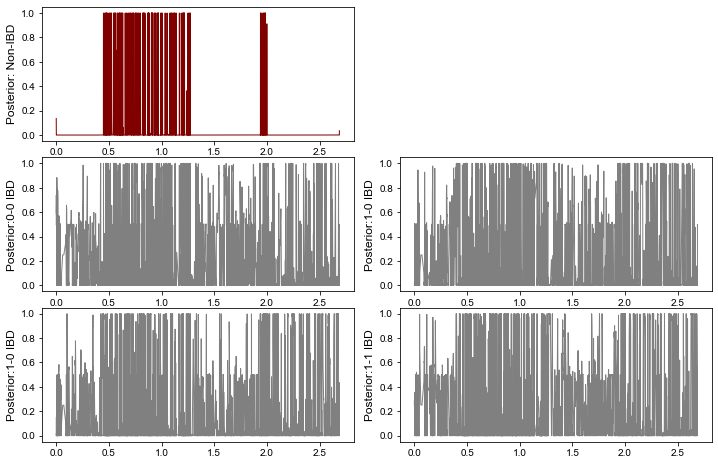

In [23]:
run_plot_pair(iids=["COR002","COR001"], ch=2)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 273.190912 mB
Total Log likelihood: -182828.986


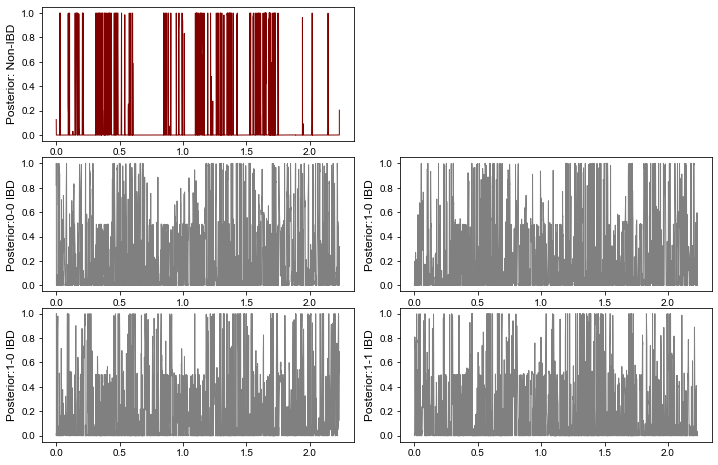

In [30]:
run_plot_pair(iids=["I18199","I18201"], ch=3)

Minimum Genetic Map: 0.0001 Morgan
Maximum Genetic Map: 2.6883 Morgan
Gaps bigger than 0.1 cM: 245
Maximum Gap: 1.8302 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 273.260544 mB
Total Log likelihood: -203152.953


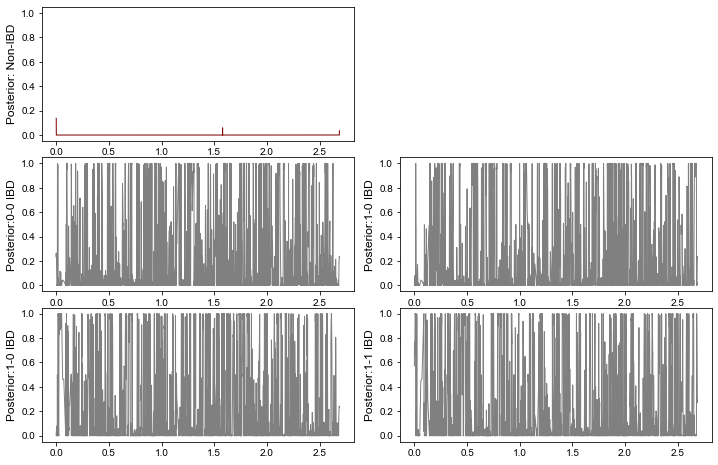

In [32]:
run_plot_pair(iids=["SUC002","SUC003"], ch=2)

Minimum Genetic Map: 0.0001 Morgan
Maximum Genetic Map: 2.6883 Morgan
Gaps bigger than 0.1 cM: 245
Maximum Gap: 1.8302 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 83.161088 mB
Total Log likelihood: -225125.116


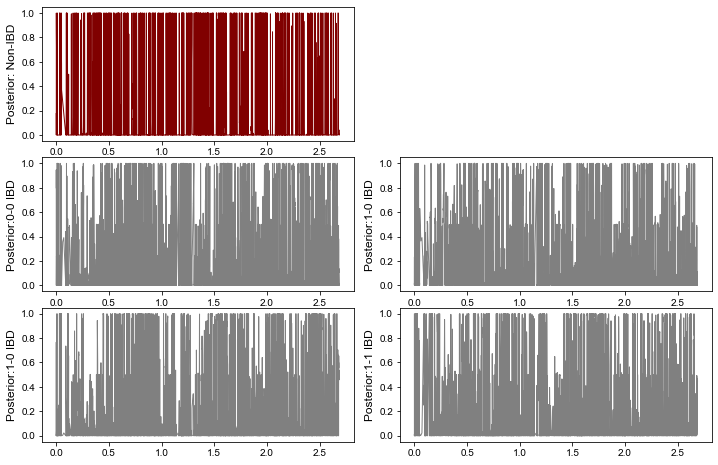

In [34]:
run_plot_pair(iids=["MA89","SUC003"], ch=2)

### Run parent offspring

Minimum Genetic Map: 0.0004 Morgan
Maximum Genetic Map: 2.0409 Morgan
Gaps bigger than 0.1 cM: 210
Maximum Gap: 1.0498 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 218.841088 mB
Total Log likelihood: -148624.683
Fraction Markers above IBD cutoff: 0.9990
Merged n=1 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 204.04 cM
Fraction Markers above IBD cutoff: 0.9990
Merged n=1 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 204.04 cM


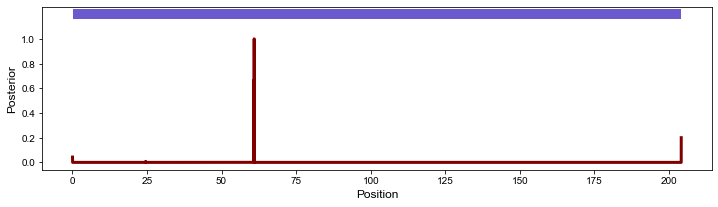

CPU times: user 839 ms, sys: 40.3 ms, total: 879 ms
Wall time: 1.54 s


In [20]:
%%time
run_plot_pair(iids=["I3949.DG","I3950.DG"], ch=5)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 201.519104 mB
Total Log likelihood: -184949.554
Fraction Markers above IBD cutoff: 0.7805
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 6.31 cM
Fraction Markers above IBD cutoff: 0.7805
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 6.31 cM


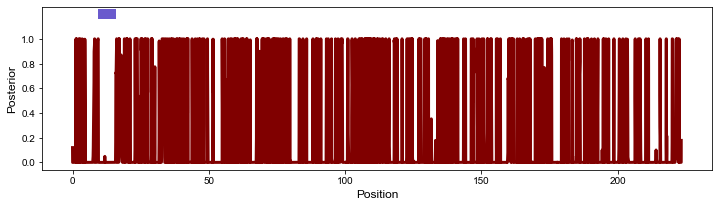

CPU times: user 804 ms, sys: 18.9 ms, total: 823 ms
Wall time: 1.22 s


In [19]:
%%time
run_plot_pair(iids=["SUC002", "MA110"], 
                    ibd_out=1, ibd_in=1, ch=3)